# Building Agents That Use Code

This notebook is part of the [Hugging Face Agents Course](https://www.hf.co/learn/agents-course), a free Course from beginner to expert, where you learn to build Agents.

![Agents course share](https://huggingface.co/datasets/agents-course/course-images/resolve/main/en/communication/share.png)

## Let's install the dependencies and login to our HF account to access the Inference API

If you haven't installed `smolagents` yet, you can do so by running the following command:

In [1]:
!pip install smolagents

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Let's also login to the Hugging Face Hub to have access to the Inference API.

In [2]:
import os
from huggingface_hub import login

login(new_session=False, token=os.getenv("HF_TOKEN"))

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [3]:
user = !huggingface-cli whoami
username = user[0]
print(f"Logged in as: {username}")

Logged in as: gperdrizet


## The `@tool` Decorator  

### Generating a tool that retrieves the highest-rated catering

Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [4]:
from smolagents import CodeAgent, InferenceClientModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=InferenceClientModel())

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 1: Duration 1.41 seconds| Input tokens: 2,053 | Output tokens: 65]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 2: Duration 2.05 seconds| Input tokens: 4,269 | Output tokens: 215]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Catering Co.")                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Catering Co.

[Step 3: Duration 1.18 seconds| Input tokens: 6,732 | Output tokens: 294]

Gotham Catering Co.


## Defining a Tool as a Python Class  

### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a **superhero-themed event**, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [5]:
from smolagents import Tool, CodeAgent, InferenceClientModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=InferenceClientModel())

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  villain_masquerade_theme = superhero_party_theme_generator(category="villain masquerade")                        
  print(villain_masquerade_theme)                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 1: Duration 1.14 seconds| Input tokens: 2,088 | Output tokens: 74]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  villain_masquerade_theme = superhero_party_theme_generator(category="villain masquerade")                        
  print(villain_masquerade_theme)                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 2: Duration 1.18 seconds| Input tokens: 4,361 | Output tokens: 153]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  print(superhero_party_theme_generator(category="villain masquerade"))                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 3: Duration 1.63 seconds| Input tokens: 6,824 | Output tokens: 264]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  villain_masquerade_theme = superhero_party_theme_generator(category="villain masquerade")                        
  print(villain_masquerade_theme)                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 4: Duration 2.05 seconds| Input tokens: 9,491 | Output tokens: 418]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  villain_masquerade_theme = superhero_party_theme_generator(category="villain masquerade")                        
  print(villain_masquerade_theme)                                                                                  
  final_answer(villain_masquerade_theme)                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 5: Duration 1.38 seconds| Input tokens: 12,422 | Output tokens: 504]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


## Sharing a Tool to the Hub

Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his `catering_service_tool` to help others find the best catering services in Gotham. Here's how to do it:

In [6]:
party_theme_tool.push_to_hub(f"{username}/catering_service_tool", token=os.environ["HF_TOKEN"])

No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/gperdrizet/catering_service_tool/commit/b211b1d2dbf569675c4ca21ac3b7e4138b4c1c57', commit_message='Upload tool', commit_description='', oid='b211b1d2dbf569675c4ca21ac3b7e4138b4c1c57', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/gperdrizet/catering_service_tool', endpoint='https://huggingface.co', repo_type='space', repo_id='gperdrizet/catering_service_tool'), pr_revision=None, pr_num=None)

## Importing a Tool from the Hub

You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A luxurious superhero-themed party at Wayne Manor with made-up superheroes. The party is grand and     
  opulent, with chandeliers, red carpet, and elegant decorations. The made-up superheroes are wearing colorful,    
  futuristic costumes and are having a great time. The scene includes a dance floor, a bar with a mixologist, and  
  guests mingling. High-res, photorealistic."                                                                      
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FD45F4480D0>

[Step 1: Duration 3.58 seconds| Input tokens: 2,083 | Output tokens: 144]

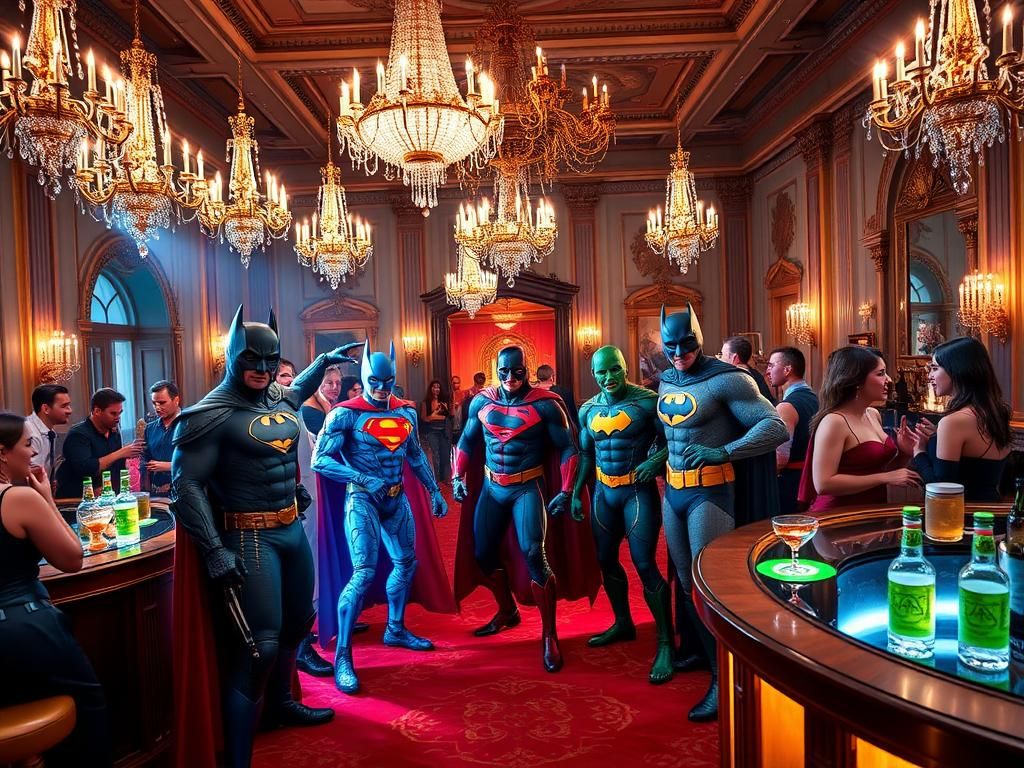

In [7]:
from smolagents import load_tool, CodeAgent, InferenceClientModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=InferenceClientModel()
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

## Importing a Hugging Face Space as a Tool

You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

In [8]:
!pip install gradio_client

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}.      │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Improving the prompt                                                                                           
  improved_prompt = "A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala. The   
  room is filled with high-tech gadgets and superhero memorabilia. The guests are dressed in colorful superhero    
  costumes, and the atmosphere is electric with excitement. Alfred, in his butler's attire, is elegantly managing  
  the event, ensuring everything runs smoothly. The lighting is dramatic, casting shadows and highlighting the     
  grandeur of the setting. High-res, photorealistic."                                                              
  print(improved_prompt)                                                                                           
                                                                                                                   
  image = image_generator(improved_prompt)                                                                         
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala. The room is filled with 
high-tech gadgets and superhero memorabilia. The guests are dressed in colorful superhero costumes, and the 
atmosphere is electric with excitement. Alfred, in his butler's attire, is elegantly managing the event, ensuring 
everything runs smoothly. The lighting is dramatic, casting shadows and highlighting the grandeur of the setting. 
High-res, photorealistic.

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FD45D68FE80>

[Step 1: Duration 4.75 seconds| Input tokens: 2,121 | Output tokens: 289]

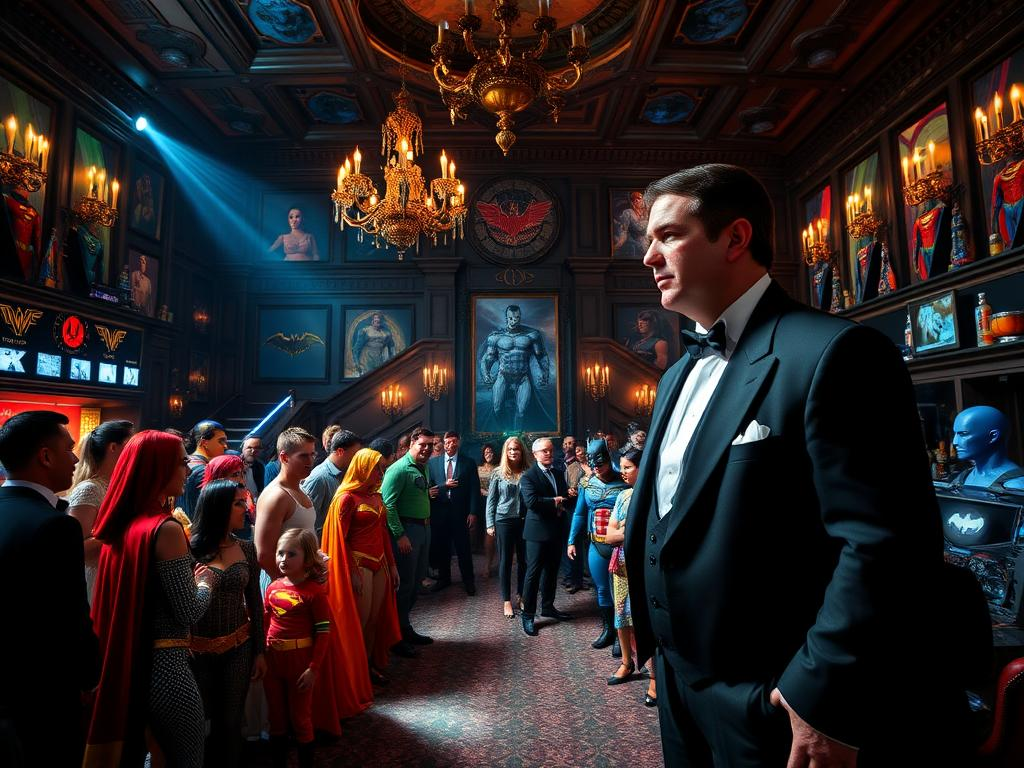

In [9]:
from smolagents import CodeAgent, InferenceClientModel, Tool, load_tool

# image_generation_tool = Tool.from_space(
#     "black-forest-labs/FLUX.1-schnell",
#     name="image_generator",
#     description="Generate an image from a prompt"
# )

image_generation_tool = load_tool("agents-course/text-to-image", trust_remote_code=True)

model = InferenceClientModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)

## Importing a LangChain Tool

These tools need a [SerpApi API Key](https://serpapi.com/).

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [10]:
!pip install langchain-community

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [11]:
from langchain.agents import load_tools
from smolagents import CodeAgent, InferenceClientModel, Tool

search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive   │
│ experiences.                                                                                                    │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment = search("luxury entertainment ideas for superhero-themed event")                           
  print(luxury_entertainment)                                                                                      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['Superman Theme Party · Superman Theme · Superman Party Decorations · Superman Party Game · Superman Baby Shower ·
Superman Birthday Party · Superman Party.', "Unleash your team's inner heroes with the ultimate superhero-themed 
event experience! From thrilling rides and immersive attractions to all-inclusive ...", 'May 10, 2020 - Explore 
Michele Victor\'s board "Super Hero Gala" on Pinterest. See more ideas about superhero party, hero, super hero 
theme.', 'Offer coloring pages featuring various superheroes and villains, suitable for all guests. Additionally, a
station for customizing masks with ...', 'Here we are to save the day, with superhero party ideas on the way! 
Discover more great party ideas at SharingPartyIdeas.com!', '100 pages of fun prints, pennants, cupcake wrappers, 
bottle labels, party hats, soda covers and everything in between.', 'I work for an event planner that organizes 
themed parties, mainly for kids birthdays and such. Today we had a superhero themed party, and this was the cake.',
'A Super Heroes theme never fails to disappoint with endless choices of colour schemes, characters to dress up as 
and spaces to decorate such as a kryptonite ...', 'Top 5 Superhero Themed Party Ideas · Silent Disco Superhero 
Party · Classic Superhero Costume Party · Superhero Training Camp · Superhero Movie Marathon · Superhero ...', 
"Choose the colors of some of their favorite heroes, buy balloons in those colors and then paint the hero's 
signature sign on them. It's a cheap ..."]

Out: None

[Step 1: Duration 1.15 seconds| Input tokens: 2,060 | Output tokens: 62]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_refined = search("luxury live performances and interactive experiences for                  
  superhero-themed event")                                                                                         
  print(luxury_entertainment_refined)                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['From LED Tron acts to fire shows & luxury entertainment, we turn every event into an unforgettable experience. + 
Discover More. Top Pages to ...', 'Themed nightclubs and lounges, home to exciting live music and beverage 
tastings; A luxurious spa offering pampering treatments; A fitness center with ...', "This thrilling themed coach 
trip is the ultimate way to kick-start your heroic adventure, departing January 2026. It's a must-experience 
getaway for MARVEL ...", 'HERO offers immersive experience programming in NYC. Discover our captivating events and 
dive into a world of excitement in Rockefeller Center.', 'DC Summer at Gaylord Opryland will include spectacular 
atrium light shows, a Super Hero scavenger hunt, themed character dining, a Super Hero ...', 'Engage in 
action-packed activities, thrilling photo ops, and dynamic performances that bring superhero stories to life. 
Versatile Appearances. Perfect for ...', 'From themed dining with heroes and villains to scavenger hunts and 
nightly light shows, guests can enjoy over a dozen DC-themed activities. The ...', 'Interactive Q&A: Organize a Q&A
session with Marvel enthusiasts or invite comic book experts to share interesting trivia and behind-the-scenes 
stories. Include ...', 'Why Choose Our Superhero-Themed Events? ✔️ Interactive performances that engage and 
entertain. ✔️ Professional cosplayers for a ...', "We provide superhero training, princess activities, art parties,
comedy ... Incredible performance that Superhero Stu did at our son's 5th birthday party."]

Out: None

[Step 2: Duration 1.34 seconds| Input tokens: 4,583 | Output tokens: 136]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import re                                                                                                        
                                                                                                                   
  # Define a function to extract relevant ideas                                                                    
  def extract_ideas(text):                                                                                         
      # Use regex to find phrases related to live performances and interactive experiences                         
      ideas = re.findall(r'\b(live performances?|interactive experiences?|dynamic performances?|themed             
  dining|scavenger hunt|light shows|Q&A|cosplayers|training|art parties|comedy)\b', text, re.IGNORECASE)           
      return list(set(ideas))  # Remove duplicates                                                                 
                                                                                                                   
  # Extract ideas from the search results                                                                          
  ideas = extract_ideas(luxury_entertainment_refined)                                                              
  print("Extracted ideas:", ideas)                                                                                 
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Extracted ideas: ['art parties', 'themed dining', 'training', 'light shows', 'scavenger hunt', 'comedy', 
'cosplayers', 'dynamic performances', 'Q&A']

Out: None

[Step 3: Duration 5.86 seconds| Input tokens: 7,583 | Output tokens: 450]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Compile a list of luxury entertainment ideas                                                                   
  luxury_entertainment_ideas = [                                                                                   
      "Live performances featuring superhero-themed musical acts",                                                 
      "Interactive Q&A sessions with comic book experts or cosplayers",                                            
      "Dynamic performances by professional cosplayers",                                                           
      "Themed dining experiences with superhero characters",                                                       
      "Scavenger hunts with superhero-themed clues",                                                               
      "Light shows and special effects displays",                                                                  
      "Art parties where guests can create superhero-themed artwork",                                              
      "Superhero training sessions with professional instructors",                                                 
      "Comedy shows with superhero-themed skits"                                                                   
  ]                                                                                                                
                                                                                                                   
  # Print the list of ideas                                                                                        
  print("Luxury Entertainment Ideas for a Superhero-Themed Event:")                                                
  for idea in luxury_entertainment_ideas:                                                                          
      print(f"- {idea}")                                                                                           
                                                                                                                   
  # Prepare the final answer                                                                                       
  final_answer(luxury_entertainment_ideas)                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Luxury Entertainment Ideas for a Superhero-Themed Event:
- Live performances featuring superhero-themed musical acts
- Interactive Q&A sessions with comic book experts or cosplayers
- Dynamic performances by professional cosplayers
- Themed dining experiences with superhero characters
- Scavenger hunts with superhero-themed clues
- Light shows and special effects displays
- Art parties where guests can create superhero-themed artwork
- Superhero training sessions with professional instructors
- Comedy shows with superhero-themed skits

Out - Final answer: ['Live performances featuring superhero-themed musical acts', 'Interactive Q&A sessions with 
comic book experts or cosplayers', 'Dynamic performances by professional cosplayers', 'Themed dining experiences 
with superhero characters', 'Scavenger hunts with superhero-themed clues', 'Light shows and special effects 
displays', 'Art parties where guests can create superhero-themed artwork', 'Superhero training sessions with 
professional instructors', 'Comedy shows with superhero-themed skits']

[Step 4: Duration 5.06 seconds| Input tokens: 11,132 | Output tokens: 873]

['Live performances featuring superhero-themed musical acts',
 'Interactive Q&A sessions with comic book experts or cosplayers',
 'Dynamic performances by professional cosplayers',
 'Themed dining experiences with superhero characters',
 'Scavenger hunts with superhero-themed clues',
 'Light shows and special effects displays',
 'Art parties where guests can create superhero-themed artwork',
 'Superhero training sessions with professional instructors',
 'Comedy shows with superhero-themed skits']

With this setup, Alfred can quickly discover luxurious entertainment options, ensuring Gotham's elite guests have an unforgettable experience. This tool helps him curate the perfect superhero-themed event for Wayne Manor! 🎉